<a href="https://colab.research.google.com/github/karthiqak47/Communication_Lab/blob/main/communication1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMMUNICATION LAB EXP-1

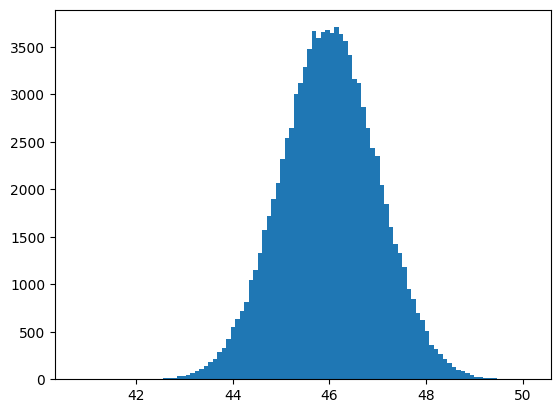

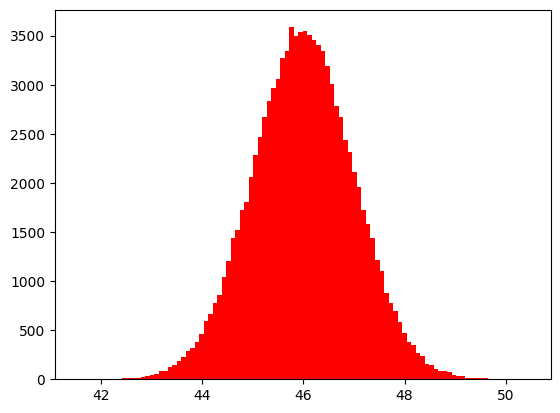

In [3]:

import numpy as np
import matplotlib.pyplot as plt
r=46
N=100000
X=np.random.normal(r,1,N)
Y=np.random.normal(r,1,N)
plt.hist(X,bins=100)
plt.show()
plt.hist(Y,bins=100,color="red")
plt.show()


#PDF

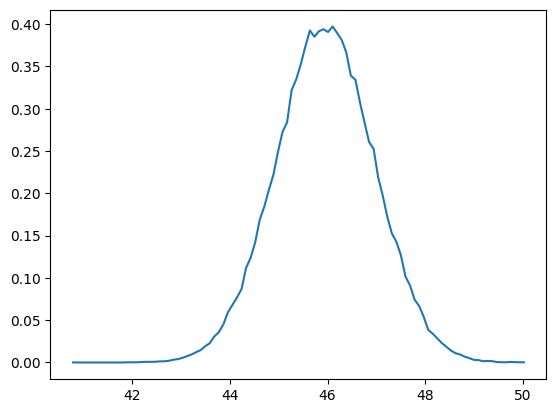

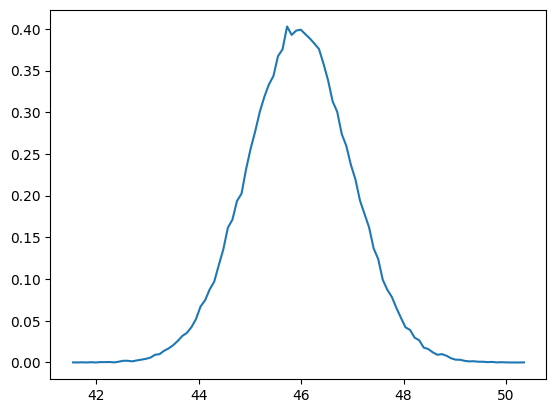

In [4]:
hx,binx= np.histogram(X, bins=100,density=True)
hy,biny= np.histogram(Y, bins=100,density=True)

plt.plot(binx[:-1], hx, label='X')
plt.show()
plt.plot(biny[:-1], hy, label='Y')
plt.show()


#CDF

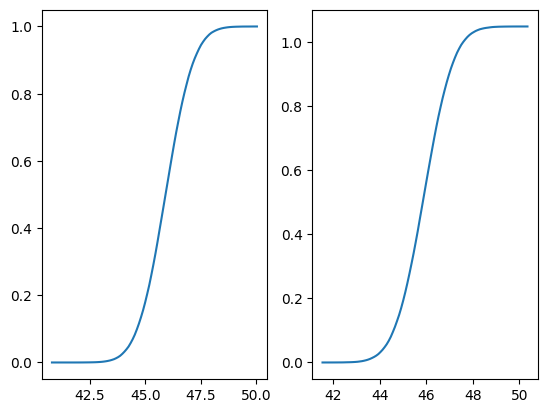

In [12]:
#cdf of pdf values from previouus plots

cdfx=np.cumsum(hx)
cdfy=np.cumsum(hy)
width=binx[1]-binx[0]
cdfx_normalized = cdfx * width
cdfy_normalized = cdfy * width

plt.subplot(1, 2, 1)
plt.plot(binx[:-1], cdfx_normalized)

plt.subplot(1, 2, 2)
plt.plot(biny[:-1], cdfy_normalized)
plt.show()


91.99490465018643
2.007239486174453


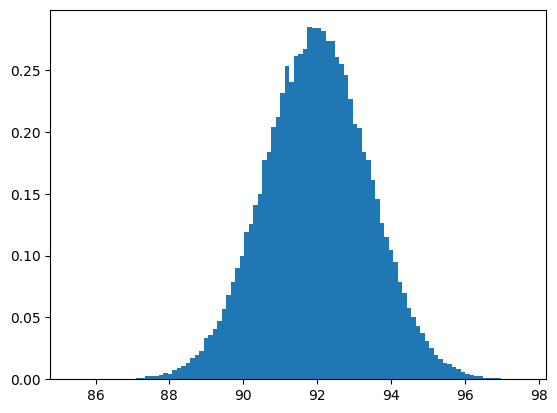

In [6]:
Z=X+Y
plt.hist(Z,bins=100,density=True)
mean=np.mean(Z)
var=np.var(Z)
print(mean)
print(var)
plt.show()

#Emperical vs THeoretical Probability

In [7]:
rule1_std = np.sum(np.abs(X - r) <= 1)
empirical_prob_1_std = rule1_std / N
print(f"P(|X - r| <= 1): {empirical_prob_1_std:.4f}")

rule_2_std = np.sum(np.abs(X - r) <= 2)
empirical_prob_2_std = rule_2_std / N
print(f"P(|X - r| <= 2): {empirical_prob_2_std:.4f}")

rule_3_std = np.sum(np.abs(X - r) <= 3)
empirical_prob_3_std = rule_3_std / N
print(f"P(|X - r| <= 3): {empirical_prob_3_std:.4f}")

P(|X - r| <= 1): 0.6828
P(|X - r| <= 2): 0.9556
P(|X - r| <= 3): 0.9974


In [8]:
#P(|X − μ| ≤ σ) ≈ 0.68, P(|X − μ| ≤ 2σ) ≈ 0.95, P(|X − μ| ≤ 3σ) ≈ 0.997.

error1 = np.abs(empirical_prob_1_std-0.680)
error2 =np.abs(empirical_prob_2_std-0.950)
error3 =np.abs(empirical_prob_3_std-0.997)

print(error1)
print(error2)
print(error3)

0.0028399999999999537
0.005580000000000029
0.00041999999999997595


#Scatter plot

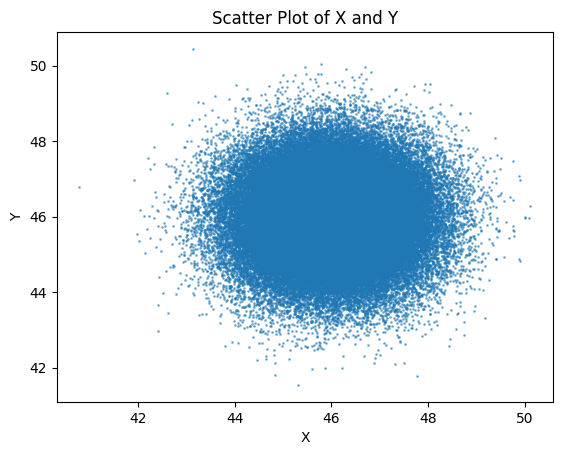

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, s=1, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y')
plt.show()

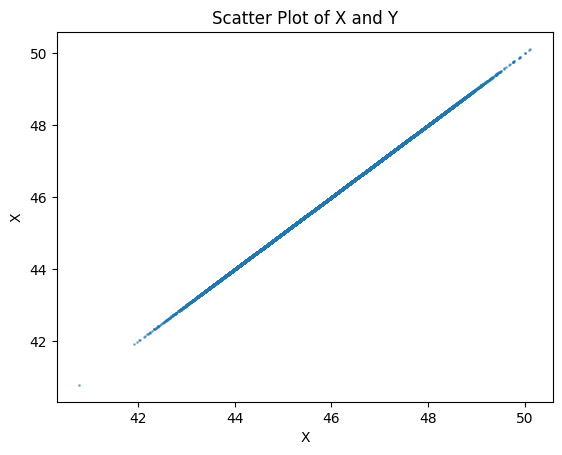

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X, X, s=1, alpha=0.5)
plt.xlabel('X')
plt.ylabel('X')
plt.title('Scatter Plot of X and Y')
plt.show()

Minimum pixel value after normalization: 0.027450980618596077
Maximum pixel value after normalization: 0.9921568632125854


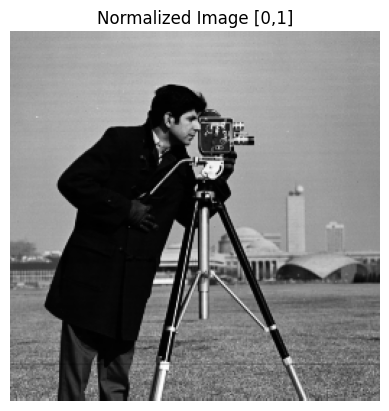

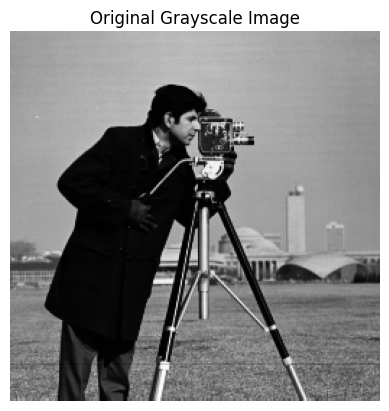

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread("/content/cameraman.png")
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Normalize to [0, 1]
img = gray.astype(np.float32) / 255.0

print(f"Minimum pixel value after normalization: {img.min()}")
print(f"Maximum pixel value after normalization: {img.max()}")

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Normalized Image [0,1]")
plt.show()

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title("Original Grayscale Image")
plt.show()



In [31]:
import numpy as np

sqnr_list = []
x=gray.flatten()
for b in range(1, 9):


    L = 2**b
    Delta = 1 / L
    k = np.floor(x / Delta).astype(int)
    k = np.clip(k, 0, L-1)

    # T2-3: b-bit codewords → serialized bitstream
    bitstream = ''.join(format(val, f'0{b}b') for val in k.flatten())

    # T2-4: Reconstruction and SQNR
    x_hat = (k + 0.5) * Delta
    noise = x - x_hat

    signal_power = (1/len(x))*np.sum(x**2)
    noise_power = (1/len(noise))*np.sum(noise**2)

    sqnr = 10 * np.log10(signal_power / noise_power)
    sqnr_list.append(sqnr)

    print(f"b = {b}, L = {L}, SQNR = {sqnr:.2f} dB, Bitstream length = {len(bitstream)}")


b = 1, L = 2, SQNR = -22.00 dB, Bitstream length = 65536
b = 2, L = 4, SQNR = -21.99 dB, Bitstream length = 131072
b = 3, L = 8, SQNR = -21.99 dB, Bitstream length = 196608
b = 4, L = 16, SQNR = -21.99 dB, Bitstream length = 262144
b = 5, L = 32, SQNR = -21.99 dB, Bitstream length = 327680
b = 6, L = 64, SQNR = -21.99 dB, Bitstream length = 393216
b = 7, L = 128, SQNR = -21.99 dB, Bitstream length = 458752
b = 8, L = 256, SQNR = -21.99 dB, Bitstream length = 524288
